# Visualisation of the current data

In [16]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import sys
sys.path.append('../src')
import data_loader

In [10]:
# Load the data
df = data_loader.uni_load_flow_data('../data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [11]:
# Sample data for quick testing
sample_df = df.head(2000)
x_train = sample_df['Total Fwd Packets'].to_numpy()
y_train = sample_df['Total Length of Fwd Packets'].astype(float).to_numpy()
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [3 4 3 ... 3 8 3]
y_train = [26. 24. 26. ... 26. 56. 26.]


Plot the original data

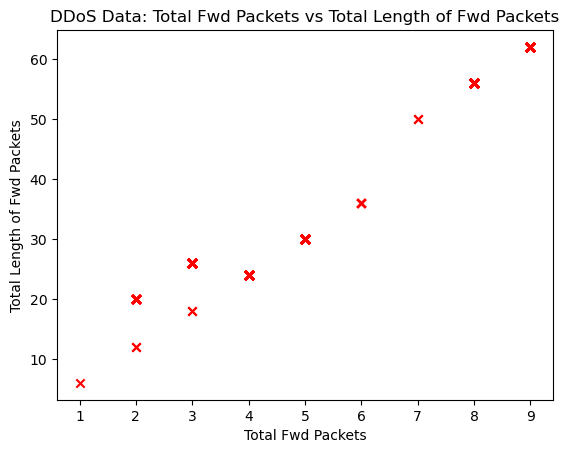

In [12]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("DDoS Data: Total Fwd Packets vs Total Length of Fwd Packets")
# Set the y-axis label
plt.ylabel('Total Length of Fwd Packets')
# Set the x-axis label
plt.xlabel('Total Fwd Packets')
plt.show()

In [13]:
# Feature scaling - divide by max value
x_train = x_train / np.max(x_train)
y_train = y_train / np.max(y_train)
print(f"Scaled x_train = {x_train}")
print(f"Scaled y_train = {y_train}")

Scaled x_train = [0.33333333 0.44444444 0.33333333 ... 0.33333333 0.88888889 0.33333333]
Scaled y_train = [0.41935484 0.38709677 0.41935484 ... 0.41935484 0.90322581 0.41935484]


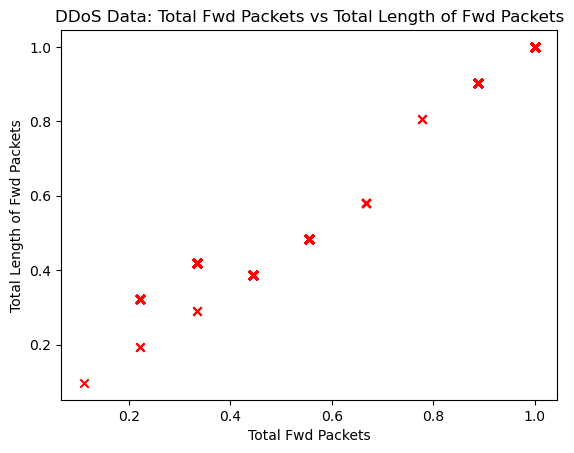

In [14]:
# Feature scaled data plot
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("DDoS Data: Total Fwd Packets vs Total Length of Fwd Packets")
# Set the y-axis label
plt.ylabel('Total Length of Fwd Packets')
# Set the x-axis label
plt.xlabel('Total Fwd Packets')
plt.show()